#Load Data

In [1]:
# Import data from Google Drive
!gdown 1OgYbPfXFAv3TbwP1Qcwt_CC9cVWSJaco

Downloading...
From: https://drive.google.com/uc?id=1OgYbPfXFAv3TbwP1Qcwt_CC9cVWSJaco
To: /home/dabestevanzzacc/indosum.tar.gz
100%|██████████████████████████████████████| 96.0M/96.0M [00:02<00:00, 43.6MB/s]


In [2]:
# Extract the dataset
import tarfile

with tarfile.open('indosum.tar.gz') as tar:
    tar.extractall()
    tar.close()

In [3]:
import os
import json

# Load data to dictionary and save as json
BASE_PATH = './indosum'
indosum = {
    'train': [],
    'dev': [],
    'test': []
}

for json_file in os.listdir('indosum'):
    if json_file.endswith('.jsonl'):
        split, fold, ext = json_file.split('.')
        file_path = os.path.join(BASE_PATH, json_file)
        
        with open(file_path, 'r') as json_file:
            json_list = list(json_file)
            #json_len = int(len(json_list) * 0.4)
            for json_str in json_list:
                result = json.loads(json_str)
                if result['category'] != 'olahraga':
                    indosum[split].append(result)

with open('indosum.json', 'w', encoding='utf-8') as f:
    json.dump(indosum, f, ensure_ascii=False, indent=2)
    

#Preprocess Data

In [4]:
import re

def add_start_end_sequence(summary):
    summary = 'START ' + summary + ' END'
    return summary

def convert_to_article(news_file):
    content_words = []
    for paragraph in news_file['paragraphs']:
        for sentence in paragraph:
            for word in sentence:
                if re.match('[A-Za-z]+', word):
                    word = str(word).lower()
                    content_words.append(word)

    summary_words = []
    for sentence in news_file['summary']:
        for word in sentence:
            if re.match('[A-Za-z]+', word):
                word = str(word).lower()
                summary_words.append(word)

    content_words = ' '.join(content_words)
    summary_words = ' '.join(summary_words)
    
    news_file['paragraphs'] = content_words
    news_file['summary'] = summary_words

In [5]:
for split in indosum.keys():
    for news in indosum[split]:
        convert_to_article(news)

In [6]:
print(indosum['train'][10]['paragraphs'])
print(indosum['train'][10]['summary'])

jakarta cnn indonesia menteri perindustrian airlangga hartarto mengatakan australia berpeluang menjadi destinasi ekspor industri otomotif nasional pasar kendaraan roda empat mencapai juta unit per tahun di sana beberapa produsen otomotif terpaksa tutup ini menjadi kesempatan yang bagus bagi indonesia untuk masuk ke pasar australia ujarnya mengutip antara kamis ia mengatakan pemerintah meminta industri otomotif di tanah air semakin agresif memperluas pasar ekspor untuk menyeimbangkan kebutuhan pasar domestik kementerian perindustrian menargetkan nilai ekspor mobil dapat tumbuh sekitar persen untuk merealisasikan target itu kemenperin merasa perlu meningkatkan penelitian dan pengembangan produk dalam penguatan inovasi serta daya saing sekaligus memenuhi selera konsumen global ia menyebutkan saat ini produksi nasional kendaraan roda empat mencapai juta unit per tahun dengan jumlah ekspor sebanyak ribu unit per tahun adapun target produksi nasional kendaraan roda empat pada mencapai juta u

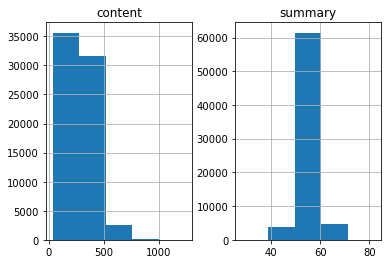

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

def visualize_words_distribution(dataset_dict):
    content_count = []
    summary_count = []

    for split in dataset_dict.keys():
        for news in dataset_dict[split]:
            content_word_count = len(news['paragraphs'].split(' '))
            summary_word_count = len(news['summary'].split(' '))
            content_count.append(content_word_count)
            summary_count.append(summary_word_count)

    average_length = pd.DataFrame() 

    average_length['content'] = content_count
    average_length['summary'] = summary_count

    average_length.hist(bins = 5)
    plt.show()
    return average_length

average_length = visualize_words_distribution(indosum)          

##Visualize Words Distribution

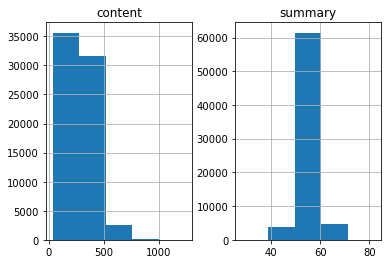

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

def visualize_words_distribution(dataset_dict):
    content_count = []
    summary_count = []

    for split in dataset_dict.keys():
        for news in dataset_dict[split]:
            content_word_count = len(news['paragraphs'].split(' '))
            summary_word_count = len(news['summary'].split(' '))
            content_count.append(content_word_count)
            summary_count.append(summary_word_count)

    average_length = pd.DataFrame() 

    average_length['content'] = content_count
    average_length['summary'] = summary_count

    average_length.hist(bins = 5)
    plt.show()
    return average_length

average_length = visualize_words_distribution(indosum)          

In [9]:
def count_words_length_percentage(max_len, length_list):
    cnt = 0
    for length in length_list:
        if length <= max_len:
            cnt = cnt + 1
    return cnt / len(length_list)

max_len_content = 500
max_len_summary = 62

print(count_words_length_percentage(max_len_content, average_length['content']))
print(count_words_length_percentage(max_len_summary, average_length['summary']))

0.9529772954448094
0.9867913751249464


In [10]:
indosum_new = {
    'train': [],
    'dev': [],
    'test': []
}

for split in indosum_new.keys():
    for news in indosum[split]:
        content_len = len(news['paragraphs'].split(' '))
        summary_len = len(news['summary'].split(' '))
        if (content_len < max_len_content) and (summary_len < (max_len_summary)):
            indosum_new[split].append(news)

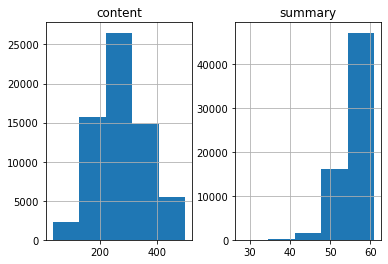

In [11]:
average_length_new = visualize_words_distribution(indosum_new)

##Split to Train, Dev, Test

In [12]:
X = {
    'train': [],
     'dev': [],
     'test': []
}
for split in indosum_new.keys():
    for news in indosum_new[split]:
        X[split].append(news['paragraphs'])

y = {
    'train': [],
     'dev': [],
     'test': []
}
for split in indosum_new.keys():
    for news in indosum_new[split]:
        summary = add_start_end_sequence(news['summary'])
        y[split].append(summary)

In [13]:
import numpy as np

X_train, X_dev, X_test = np.array(X['train'], dtype='object'), np.array(X['dev'], dtype='object'), np.array(X['test'], dtype='object')
y_train, y_dev, y_test = np.array(y['train'], dtype='object'), np.array(y['dev'], dtype='object'), np.array(y['test'], dtype='object')

##Tokenization

In [14]:
# Tokenize the text to get the vocab count 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Prepare a tokenizer on training data
x_tokenizer = Tokenizer(lower=False) 
x_tokenizer.fit_on_texts(list(X_train))

In [15]:
# Counting the number of rare words
def count_rare_words(threshold, tokenizer):
    count = 0
    total_count = 0

    for key, value in tokenizer.word_counts.items():
        total_count += 1
        if value < threshold:
            count += 1
            
    print('Threshold: {}'.format(threshold))
    print("% of rare words in vocabulary: ", (count / total_count) * 100)

    return count, total_count

count, total_count = count_rare_words(4, x_tokenizer)

Threshold: 4
% of rare words in vocabulary:  7.755063433321116


In [16]:
padding_type = 'post'
truncation_type = 'post'

# Prepare tokenizer without rare_words
x_tokenizer = Tokenizer(num_words = total_count - count, lower=False) 
x_tokenizer.fit_on_texts(list(X_train))

# Convert text sequences to integer sequences 
x_train_seq = x_tokenizer.texts_to_sequences(X_train) 
x_dev_seq = x_tokenizer.texts_to_sequences(X_dev)
x_test_seq = x_tokenizer.texts_to_sequences(X_test)

# Pad zero upto maximum length
x_train = pad_sequences(x_train_seq,  maxlen=max_len_content, padding=padding_type, truncating=truncation_type)
x_dev = pad_sequences(x_dev_seq, maxlen=max_len_content, padding=padding_type, truncating=truncation_type)
x_test = pad_sequences(x_test_seq,  maxlen=max_len_content, padding=padding_type, truncating=truncation_type)

# Size of vocabulary (+1 for padding token)
x_vocab = x_tokenizer.num_words + 1

print("Size of vocabulary in X = {}".format(x_vocab))

Size of vocabulary in X = 78019


In [17]:
# Prepare a tokenizer on test data
y_tokenizer = Tokenizer(lower=False)
y_tokenizer.fit_on_texts(list(y_train))

count_test, total_count_test = count_rare_words(4, y_tokenizer)

Threshold: 4
% of rare words in vocabulary:  7.895882722918381


In [18]:
# Prepare a tokenizer, again -- by not considering the rare words
y_tokenizer = Tokenizer(num_words = total_count_test - count_test, lower=False)
y_tokenizer.fit_on_texts(list(y_train))

# Convert text sequences to integer sequences 
y_train_seq = y_tokenizer.texts_to_sequences(y_train) 
y_dev_seq = y_tokenizer.texts_to_sequences(y_dev)
y_test_seq = y_tokenizer.texts_to_sequences(y_test)

# Pad zero upto maximum length
y_train = pad_sequences(y_train_seq,  maxlen=max_len_summary, padding=padding_type, truncating=truncation_type)
y_dev = pad_sequences(y_dev_seq, maxlen=max_len_summary, padding=padding_type, truncating=truncation_type)
y_test = pad_sequences(y_test_seq,  maxlen=max_len_summary, padding=padding_type, truncating=truncation_type)

# Size of vocabulary (+1 for padding token)
y_vocab = y_tokenizer.num_words + 1

print("Size of vocabulary in y = {}".format(y_vocab))

Size of vocabulary in y = 38075


In [19]:
#Checking the length of training data
y_tokenizer.word_counts['END'],len(y_train)

(49202, 49202)

#Building Model

In [20]:
#Model Building

#Adding Custom Attention layer 

import tensorflow as tf
import os
from tensorflow.keras.layers import Layer
from tensorflow.keras import backend as K


class AttentionLayer(Layer):
    """
    This class implements Bahdanau attention (https://arxiv.org/pdf/1409.0473.pdf).
    There are three sets of weights introduced W_a, U_a, and V_a
     """

    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        assert isinstance(input_shape, list)
        # Create a trainable weight variable for this layer.

        self.W_a = self.add_weight(name='W_a',
                                   shape=tf.TensorShape((input_shape[0][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.U_a = self.add_weight(name='U_a',
                                   shape=tf.TensorShape((input_shape[1][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.V_a = self.add_weight(name='V_a',
                                   shape=tf.TensorShape((input_shape[0][2], 1)),
                                   initializer='uniform',
                                   trainable=True)

        super(AttentionLayer, self).build(input_shape)  # Be sure to call this at the end

    def call(self, inputs, verbose=False):
        """
        inputs: [encoder_output_sequence, decoder_output_sequence]
        """
        assert type(inputs) == list
        encoder_out_seq, decoder_out_seq = inputs
        if verbose:
            print('encoder_out_seq>', encoder_out_seq.shape)
            print('decoder_out_seq>', decoder_out_seq.shape)

        def energy_step(inputs, states):
            """ Step function for computing energy for a single decoder state """

            assert_msg = "States must be a list. However states {} is of type {}".format(states, type(states))
            assert isinstance(states, list) or isinstance(states, tuple), assert_msg

            """ Some parameters required for shaping tensors"""
            en_seq_len, en_hidden = encoder_out_seq.shape[1], encoder_out_seq.shape[2]
            de_hidden = inputs.shape[-1]

            """ Computing S.Wa where S=[s0, s1, ..., si]"""
            # <= batch_size*en_seq_len, latent_dim
            reshaped_enc_outputs = K.reshape(encoder_out_seq, (-1, en_hidden))
            # <= batch_size*en_seq_len, latent_dim
            W_a_dot_s = K.reshape(K.dot(reshaped_enc_outputs, self.W_a), (-1, en_seq_len, en_hidden))
            if verbose:
                print('wa.s>',W_a_dot_s.shape)

            """ Computing hj.Ua """
            U_a_dot_h = K.expand_dims(K.dot(inputs, self.U_a), 1)  # <= batch_size, 1, latent_dim
            if verbose:
                print('Ua.h>',U_a_dot_h.shape)

            """ tanh(S.Wa + hj.Ua) """
            # <= batch_size*en_seq_len, latent_dim
            reshaped_Ws_plus_Uh = K.tanh(K.reshape(W_a_dot_s + U_a_dot_h, (-1, en_hidden)))
            if verbose:
                print('Ws+Uh>', reshaped_Ws_plus_Uh.shape)

            """ softmax(va.tanh(S.Wa + hj.Ua)) """
            # <= batch_size, en_seq_len
            e_i = K.reshape(K.dot(reshaped_Ws_plus_Uh, self.V_a), (-1, en_seq_len))
            # <= batch_size, en_seq_len
            e_i = K.softmax(e_i)

            if verbose:
                print('ei>', e_i.shape)

            return e_i, [e_i]

        def context_step(inputs, states):
            """ Step function for computing ci using ei """
            # <= batch_size, hidden_size
            c_i = K.sum(encoder_out_seq * K.expand_dims(inputs, -1), axis=1)
            if verbose:
                print('ci>', c_i.shape)
            return c_i, [c_i]

        def create_inital_state(inputs, hidden_size):
            # We are not using initial states, but need to pass something to K.rnn funciton
            fake_state = K.zeros_like(inputs)  # <= (batch_size, enc_seq_len, latent_dim
            fake_state = K.sum(fake_state, axis=[1, 2])  # <= (batch_size)
            fake_state = K.expand_dims(fake_state)  # <= (batch_size, 1)
            fake_state = K.tile(fake_state, [1, hidden_size])  # <= (batch_size, latent_dim
            return fake_state

        fake_state_c = create_inital_state(encoder_out_seq, encoder_out_seq.shape[-1])
        fake_state_e = create_inital_state(encoder_out_seq, encoder_out_seq.shape[1])  # <= (batch_size, enc_seq_len, latent_dim

        """ Computing energy outputs """
        # e_outputs => (batch_size, de_seq_len, en_seq_len)
        last_out, e_outputs, _ = K.rnn(
            energy_step, decoder_out_seq, [fake_state_e],
        )

        """ Computing context vectors """
        last_out, c_outputs, _ = K.rnn(
            context_step, e_outputs, [fake_state_c],
        )

        return c_outputs, e_outputs

    def compute_output_shape(self, input_shape):
        """ Outputs produced by the layer """
        return [
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[1][2])),
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[0][1]))
        ]

In [21]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, \
    Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

In [22]:
K.clear_session()

latent_dim = 256
embedding_dim = 256

# Setup encoder
encoder_inputs = Input(shape=(max_len_content, ), name='text_input')

encoder_emb = Embedding(x_vocab, embedding_dim, trainable=True)(encoder_inputs)

#encoder lstm 1
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(encoder_emb)

#encoder lstm 2
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

#encoder lstm 3
encoder_lstm3 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4)
encoder_outputs, state_h, state_c = encoder_lstm3(encoder_output2)

#Setting up the Decoder using 'encoder_states' as initial state
decoder_inputs = Input(shape=(None,))

#Embedding layer
decoder_emb_layer = Embedding(y_vocab, embedding_dim,trainable=True)
decoder_emb = decoder_emb_layer(decoder_inputs)

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=0.4)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(decoder_emb,initial_state=[state_h, state_c])

#Attention layer
attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])

#Concating Attention input and Decoder LSTM output
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

# Dense Layer
decoder_dense = TimeDistributed(Dense(y_vocab, activation='softmax'))
decoder_outputs = decoder_dense(decoder_concat_input)

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()

2022-06-05 12:53:47.550410: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-05 12:53:47.722536: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-05 12:53:47.723237: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-05 12:53:47.727149: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text_input (InputLayer)        [(None, 500)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 500, 256)     19972864    ['text_input[0][0]']             
                                                                                                  
 lstm (LSTM)                    [(None, 500, 256),   525312      ['embedding[0][0]']              
                                 (None, 256),                                                     
                                 (None, 256)]                                                     
                                                                                              

In [23]:
#Visualize the Model
from tensorflow.keras.utils import plot_model

#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [24]:
#Adding Metrics
model.compile(optimizer='rmsprop' , loss='sparse_categorical_crossentropy' , metrics=['accuracy'])

#Adding Callback
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)

In [25]:
#Training the Model
history = model.fit([x_train,y_train[:,:-1]], 
                    y_train.reshape(y_train.shape[0],y_train.shape[1], 1)[:,1:],
                    epochs=50,
                    callbacks=[es],
                    batch_size= 64,
                    validation_data=([x_test,y_test[:,:-1]], 
                                     y_test.reshape(y_test.shape[0],y_test.shape[1], 1)[:,1:]))

Epoch 1/50


2022-06-05 12:53:51.899053: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 98404000 exceeds 10% of free system memory.
2022-06-05 12:54:00.117107: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8200


769/769 [==============================] - ETA: 0s - loss: 6.9582 - accuracy: 0.1155

2022-06-05 13:05:19.551523: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 25908000 exceeds 10% of free system memory.


769/769 [==============================] - 756s 968ms/step - loss: 6.9582 - accuracy: 0.1155 - val_loss: 6.1957 - val_accuracy: 0.1495
Epoch 2/50
769/769 [==============================] - 744s 968ms/step - loss: 5.9156 - accuracy: 0.1712 - val_loss: 5.4805 - val_accuracy: 0.1979
Epoch 3/50
769/769 [==============================] - 794s 1s/step - loss: 5.3627 - accuracy: 0.2085 - val_loss: 5.0024 - val_accuracy: 0.2337
Epoch 4/50
769/769 [==============================] - 744s 968ms/step - loss: 4.9794 - accuracy: 0.2368 - val_loss: 4.6607 - val_accuracy: 0.2612
Epoch 5/50
769/769 [==============================] - 744s 967ms/step - loss: 4.6827 - accuracy: 0.2600 - val_loss: 4.3507 - val_accuracy: 0.2892
Epoch 6/50
769/769 [==============================] - 744s 967ms/step - loss: 4.4377 - accuracy: 0.2814 - val_loss: 4.0963 - val_accuracy: 0.3144
Epoch 7/50
769/769 [==============================] - 744s 967ms/step - loss: 4.2244 - accuracy: 0.3008 - val_loss: 3.8866 - val_accuracy:

In [37]:
model.save('baseline_2')
#!zip -r baseline_2.zip baseline_2/

INFO:tensorflow:Assets written to: baseline_2/assets


INFO:tensorflow:Assets written to: baseline_2/assets


In [29]:
import pickle

with open('history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

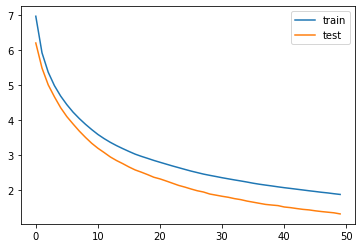

In [30]:
from matplotlib import pyplot

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [31]:
#Building Dictionary for Source Vocabulary
reverse_target_word_index=y_tokenizer.index_word 
reverse_source_word_index=x_tokenizer.index_word 
target_word_index=y_tokenizer.word_index

In [32]:
#Inference/Validation Phase
#Encoding the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

#Decoder setup
#These tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_len_content,latent_dim))

#Getting the embeddings of the decoder sequence
dec_emb2= decoder_emb_layer(decoder_inputs) 

#Setting the initial states to the states from the previous time step for better prediction
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

#Attention inference
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

#Adding Dense softmax layer to generate proability distribution over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_inf_concat) 

#Final Decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [33]:
#Function defining the implementation of inference process
import numpy as np
def decode_sequence(input_seq):
    #Encoding the input as state vectors
    e_out, e_h, e_c = encoder_model.predict(input_seq)
    
    #Generating empty target sequence of length 1
    target_seq = np.zeros((1,1))
    
    #Populating the first word of target sequence with the start word
    target_seq[0, 0] = target_word_index['START']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
      
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        #Sampling a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        if sampled_token_index == 0:
            continue
        sampled_token = reverse_target_word_index[sampled_token_index]
        
        if sampled_token != 'END':
            decoded_sentence += ' '+sampled_token

        #Exit condition: either hit max length or find stop word
        if (sampled_token == 'END' or len(decoded_sentence.split()) >= (max_len_summary-1)):
            stop_condition = True

        #Updating the target sequence (of length 1)
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        #Updating internal states
        e_h, e_c = h, c

    return decoded_sentence

In [34]:
#Functions to convert an integer sequence to a word sequence for summary as well as reviews 
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['START']) and i!=target_word_index['END']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

In [35]:
#for i, news in enumerate(x_dev):
#    print ('Review:', seq2text(news))
#    print ('Original summary:', seq2summary(y_dev[i]))
#    print ('Predicted summary:', decode_sequence(news.reshape(1,
#           max_len_content)))
#    print ('\n')

In [36]:
print("Review:",seq2text(x_train[1]))
print("Original summary:",seq2summary(y_train[1]))
print("Predicted summary:",decode_sequence(x_train[1].reshape(1,max_len_content)))

Review: jakarta cnn indonesia predikat film terbaik di academy awards selalu menjadi incaran tertinggi ajang penghargaan bidang perfilman hollywood itu namun kini studio studio mulai mencari penghargaan alternatif yang tak kalah membanggakan setidaknya mereka memenangi film animasi terbaik terbukti tahun ini pendaftar kategori film animasi terbaik memecahkan rekor terbanyak yang pernah ada dalam sejarah academy awards terhitung ada film animasi yang dimasukkan demi mengejar predikat film animasi terbaik itu disampaikan academy of motion picture arts and sciences melalui pengumuman yang disampaikan pada jumat mengutip the hollywood reporter ramainya persaingan di kategori itu mengindikasikan hal lain artinya studio juga mulai menganggap serius produksi film film animasi di antara para pendaftar ada pixar yang memasukkan finding dory disney animation yang menjagokan zootopia dan moana illumination yang mengantarkan the secret life of pets dan sing dreamworks animation dengan kung fu pand